# Interpolation of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [2]:
def expTaylor(x, x0, nmax):
#     x: Argument
#     x0: Point around the expansion
#     nmax: number of sums
    t = 0
    for i in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**i / np.math.factorial(i)
    return t

In [3]:
exp_taylor = expTaylor(1, 0, 10)
print(f"e^1: {np.e**1}\n\n taylor expansion around x0 = 0 of e^x at x = 1: {exp_taylor}\n\n error: {abs(np.e**1-exp_taylor)}")

e^1: 2.718281828459045

 taylor expansion around x0 = 0 of e^x at x = 1: 2.7182818011463845

 error: 2.7312660577649694e-08


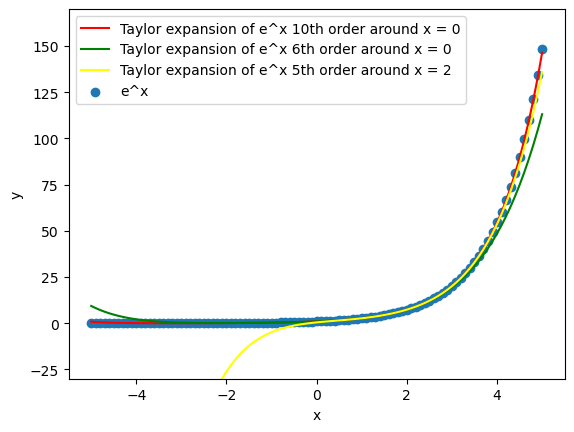

In [4]:
x = np.linspace(-5, 5, 101)
y1 = np.e**x
y2 = expTaylor(x, 0, 10)
y3 = expTaylor(x, 0, 6)
y4 = expTaylor(x, 2, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-30,170])
plt.plot(x, y2,color='red',label ="Taylor expansion of e^x 10th order around x = 0" )
plt.plot(x, y3,color='green',label ="Taylor expansion of e^x 6th order around x = 0" )
plt.plot(x, y4,color='yellow',label ="Taylor expansion of e^x 5th order around x = 2" )
plt.scatter(x, y1, label = "e^x")
plt.legend()

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [5]:
def sinTaylor(x, nmax):
#     x: Argument
#     nmax: number of sums
    t = 0
    for i in range(nmax+1):
        t = t + (-1)**i * x**(2*i+1) / np.math.factorial(2*i+1)
    return t

- Accuracy of \\( \sin(10.5) \\)

In [6]:
sin_taylor = sinTaylor(10.5, 10)
print(f"sin(10.5): {np.sin(10.5)}\n\n taylor expansion around x0 = 0 of sin(x) at x = 10.5: {sin_taylor}\n\n error: {abs(np.sin(10.5)-sin_taylor)}")

sin(10.5): -0.87969575997167

 taylor expansion around x0 = 0 of sin(x) at x = 10.5: 9.119622235844645

 error: 9.999317995816314


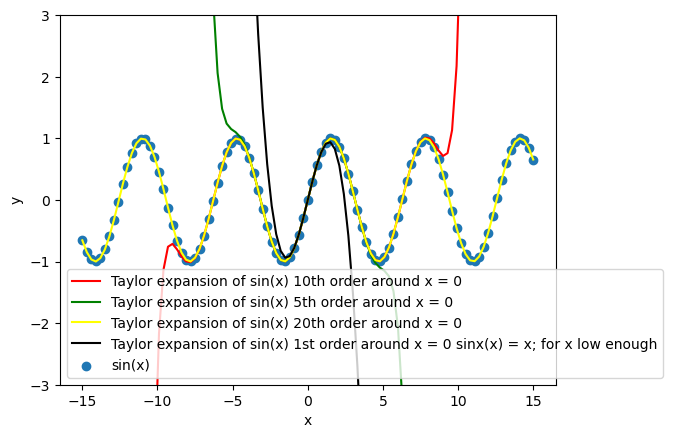

In [7]:
x = np.linspace(-15, 15, 101)
y1 = np.sin(x)
y2 = sinTaylor(x, 10)
y3 = sinTaylor(x, 5)
y4 = sinTaylor(x, 20)
y5 = sinTaylor(x, 1)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-3,3])
plt.plot(x, y2,color='red',label ="Taylor expansion of sin(x) 10th order around x = 0" )
plt.plot(x, y3,color='green',label ="Taylor expansion of sin(x) 5th order around x = 0" )
plt.plot(x, y4,color='yellow',label ="Taylor expansion of sin(x) 20th order around x = 0" )
plt.plot(x, y5,color='black',label ="Taylor expansion of sin(x) 1st order around x = 0 sinx(x) = x; for x low enough" )
plt.scatter(x, y1, label = "sin(x)")
plt.legend(loc = "lower left")

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [8]:
def derivative(f, x0, h):
#     f: function
#     x: Argument of f
#     h: Stepsize
    return (f(x0+h) - f(x0)) / h

def func(x):
    return np.sin(x)

derivative(func, 0, 0.001)

0.9999998333333416

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [9]:
def nDerivative(f, x0, h, n):
#     f: function
#     x: Argument of f
#     h: Stepsize
#     n: nth derivative
    t = 0
    for i in range(n+1):
        t = t + (-1)**(i+n)*np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i))*f(x0+i*h)
    return t / h**n

In [10]:
nDerivative(func, 0, 0.001, 0)

0.0

In [11]:
nDerivative(func, 0, 0.001, 1)

0.9999998333333416

In [12]:
nDerivative(func, 0, 0.001, 2)

-0.0009999997501071445

In [13]:
nDerivative(func, 0, 0.001, 3)

-0.9999987500390605

### General Taylor expansion

In [14]:
def Taylor(f, x, x0, h, n):
    t = 0
    for i in range(n+1):
        t = t + nDerivative(f, x0, h, i)*(x-x0)**i / np.math.factorial(i)
    return t

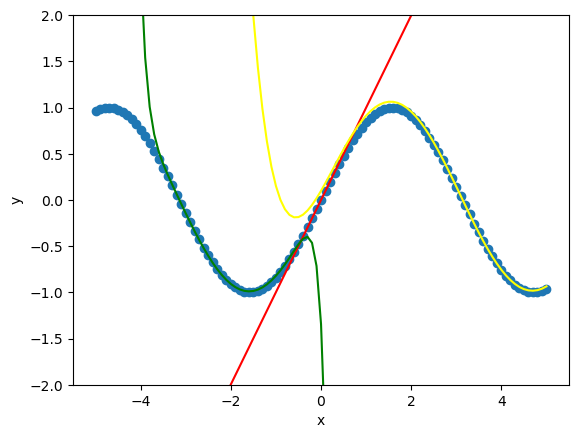

In [15]:
x = np.linspace(-5, 5, 101)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2,2])
plt.plot(x, Taylor(func, x, 0, 0.1, 1),color='red')
plt.plot(x, Taylor(func, x, -2, 0.05, 15),color='green')
plt.plot(x, Taylor(func, x, 4, 0.05, 10),color='yellow')
plt.scatter(x, func(x))

## 2. Interpolation

### 2.1 Generate data points

In [120]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

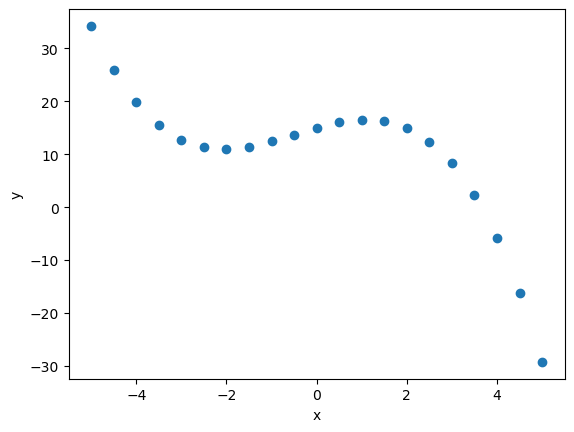

In [121]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

[[ -4.8912231   -4.35327276  -3.91805265  -3.49332977  -2.81867162
   -2.49432883  -1.84836538  -1.26842675  -0.94554452  -0.32090507
    0.15194753   0.65544602   1.24770437   1.63286161   2.05359971
    2.60475899   3.19365189   3.62629375   4.03792314   4.72752077
    5.09198525]
 [ 35.44065504  29.639682    20.5206237   21.5181379   20.36896732
   13.42935244  13.96084532  17.23907969  21.79582806  18.77150589
   22.5058174   24.45947628  19.58231647  17.78241515  20.87116077
   19.36593976  11.33122813   8.951385    -0.59645972  -8.46652656
  -24.06264929]]


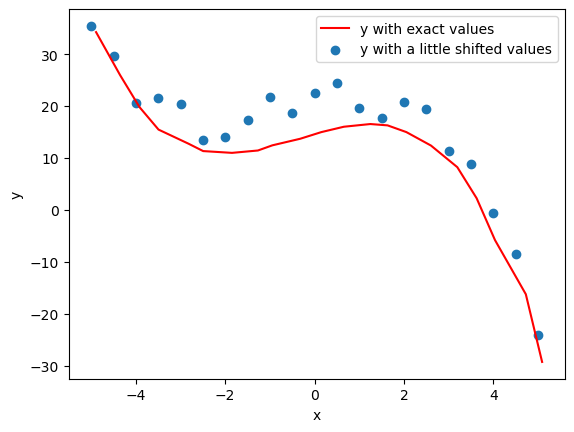

In [136]:
data = np.array([data0[0] + 0.25*np.random.rand(npoints), data0[1] + 10*np.random.rand(npoints)])
print(data)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(data[0], data0[1], color = "red", label = "y with exact values")
plt.scatter(data0[0], data[1], label = "y with a little shifted values")
plt.legend()

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

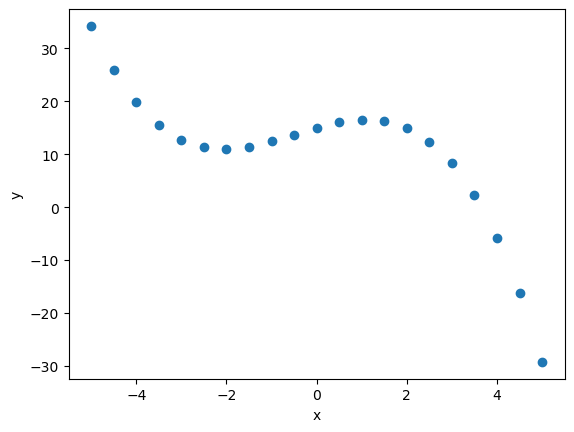

In [137]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])

In [138]:
from scipy import interpolate

- linear splines

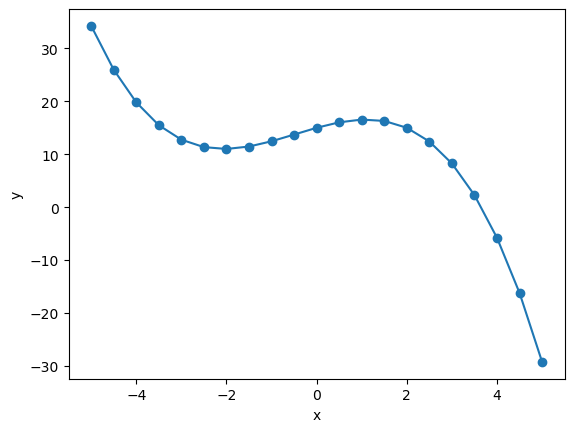

In [139]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = "linear")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

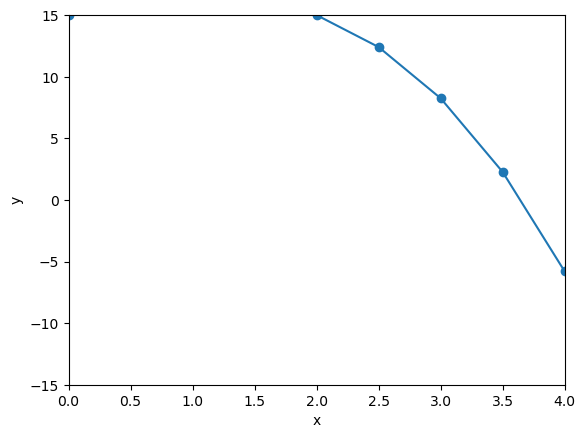

In [140]:
plt.xlim([0,4])
plt.ylim([-15,15])
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- cubic spline

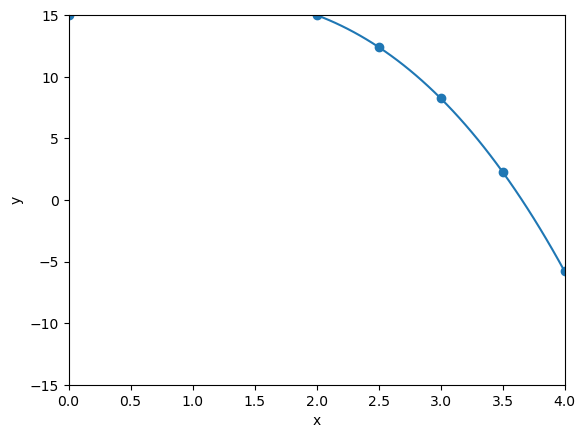

In [141]:
x_list = np.linspace(-5,5,201)

splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = "cubic")

plt.xlim([0,4])
plt.ylim([-15,15])
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data0[0], data0[1])


plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

[[ -5.          -4.5         -4.          -3.5         -3.
   -2.5         -2.          -1.5         -1.          -0.5
    0.           0.5          1.           1.5          2.
    2.5          3.           3.5          4.           4.5
    5.        ]
 [ 37.69722121  27.22321451  22.25833766  18.30399237  17.63906425
   14.31066215  14.53407187  15.28737594  13.58361028  18.61635833
   15.67479703  18.11736321  19.85847016  16.69433633  17.11213986
   16.02937048  10.57827878   3.96819258  -5.16256233 -14.10268179
  -28.7979678 ]]


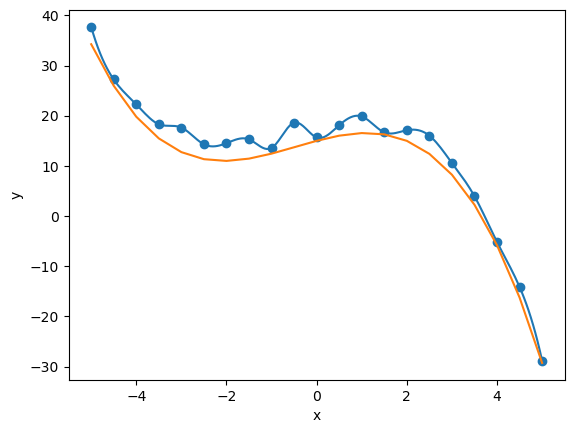

In [142]:
data = np.array([data0[0], data0[1] + 5*np.random.rand(npoints)])
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(data0[0], data[1])

x_list = np.linspace(-5,5,201)

splineCubic = interpolate.interp1d(data[0], data[1], kind = "cubic")

plt.plot(x_list, splineCubic(x_list))
plt.plot(data0[0], data0[1])
print(data)

- How to handle data which is not smooth?

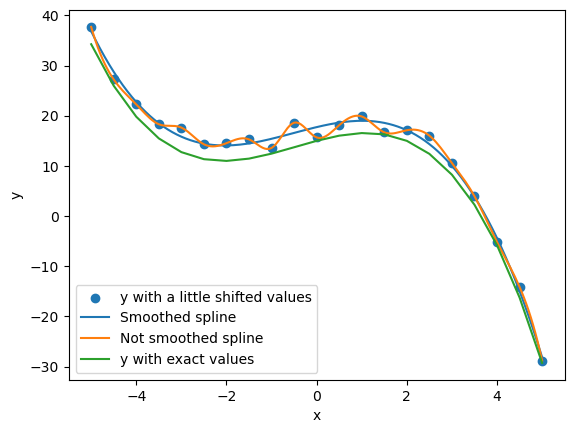

In [143]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(50)

plt.xlabel("x")
plt.ylabel("y")

plt.scatter(data[0], data[1],  label = "y with a little shifted values")

x_list = np.linspace(-5,5,201)

plt.plot(x_list, splineSmooth(x_list), label = "Smoothed spline")
plt.plot(x_list, splineCubic(x_list), label = "Not smoothed spline")
plt.plot(data0[0], data0[1], label = "y with exact values")
plt.legend(loc = "lower left")

- How to handle data which is not smooth

# Add-on: How you can always fit a data with a polynomial

In [144]:
datapoly = data[:,7:14]

In [145]:
datapoly

array([[-1.5       , -1.        , -0.5       ,  0.        ,  0.5       ,
         1.        ,  1.5       ],
       [15.28737594, 13.58361028, 18.61635833, 15.67479703, 18.11736321,
        19.85847016, 16.69433633]])

We have 7 data points. That means we need a 6th order polynomial for the perfect interpolation.

$f(x)=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4+a_5x^5+a_6x^6$

This polynomial gives the correct value for all points $x_i,y_i$

$y_i=a_i+a_ix_i+a_ix^2_i+a_ix^3_i+a_ix^4_i+a_ix^5_i+a_ix^6_i$

We can express these 7 equations (i = 0,...,6) as a matrix equation:

\begin{gather}
    \begin{pmatrix}
    y_0 \\
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
    y_5 \\
    y_6 \\
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 & x_0& x_0^2& x_0^3& x_0^4& x_0^5& x_0^6\\
    1 & x_1& x_1^2& x_1^3& x_1^4& x_1^5& x_1^6\\
    1 & x_2& x_2^2& x_2^3& x_2^4& x_2^5& x_2^6\\
    1 & x_3& x_3^2& x_3^3& x_3^4& x_3^5& x_3^6\\
    1 & x_4& x_4^2& x_4^3& x_4^4& x_4^5& x_4^6\\
    1 & x_5& x_5^2& x_5^3& x_5^4& x_5^5& x_5^6\\
    1 & x_6& x_6^2& x_6^3& x_6^4& x_6^5& x_6^6\\
    \end{pmatrix}
        \begin{pmatrix}
    a_0 \\
    a_1 \\
    a_2 \\
    a_3 \\
    a_4 \\
    a_5 \\
    a_6 \\
    \end{pmatrix}
\end{gather}

The middle matrix is just a maatrix of numbers that we can calculate

In [146]:
x = np.array([datapoly[0]**i for i in range(len(datapoly[0]))])
x_T = np.transpose(x)
print(x_T)

[[ 1.       -1.5       2.25     -3.375     5.0625   -7.59375  11.390625]
 [ 1.       -1.        1.       -1.        1.       -1.        1.      ]
 [ 1.       -0.5       0.25     -0.125     0.0625   -0.03125   0.015625]
 [ 1.        0.        0.        0.        0.        0.        0.      ]
 [ 1.        0.5       0.25      0.125     0.0625    0.03125   0.015625]
 [ 1.        1.        1.        1.        1.        1.        1.      ]
 [ 1.        1.5       2.25      3.375     5.0625    7.59375  11.390625]]


In [147]:
y = datapoly[1,:]

Now, we can solve the system of linear (in $a_i$) equations. We use numpy routine.

In [148]:
sol = np.linalg.solve(x_T, y)
print(sol)

[ 15.67479703  -2.58405197  15.53868357   9.21314254 -20.61147257
  -3.49166063   6.11903218]


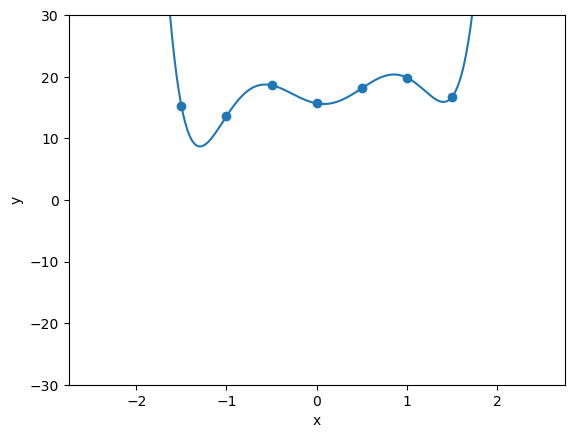

In [149]:
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-30, 30])

x_list = np.linspace(-2.5, 2.5, 901)
y_list = [sol[i]*x_list**i for i in range(len(sol))]
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, sum(y_list))

## Generalized procedure for more data

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0